# An introduction to machine learning with scikit-learn¶

see: https://sklearn.org/tutorial/basic/tutorial.html

## datasets in sklearn:
scikit-learn comes with a few standard datasets, for instance the iris and digits datasets for classification and the boston house prices dataset for regression.


In [2]:
from sklearn import datasets
iris = datasets.load_iris()
digits = datasets.load_digits()


In [3]:
digits.keys()


dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [4]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [5]:
print(digits.target)

In [6]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

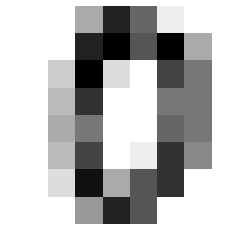

In [7]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

plt.imshow(digits.images[0], cmap=matplotlib.cm.binary,
           interpolation="nearest")
plt.axis("off")
plt.show()

## Learning and predicting

In scikit-learn, an estimator for classification is a Python object that implements the methods 'fit(X, y)' and 'predict(T)'.

In [8]:
from sklearn import svm
clf = svm.SVC(gamma=0.001, C=100.)

We call our estimator instance clf, as it is a classifier. It now must be fitted to the model, that is, it must learn from the model. This is done by passing our training set to the fit method.

In [9]:
clf.fit(digits.data[:-1], digits.target[:-1])

SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [10]:
clf.predict(digits.data[-1:])

array([8])

for more info on how to recognize hand written digits see: https://sklearn.org/auto_examples/classification/plot_digits_classification.html#sphx-glr-auto-examples-classification-plot-digits-classification-py

## Model persistence

It is possible to save a model in the scikit by using Python’s built-in persistence model, namely pickle:

In [11]:
clf = svm.SVC(gamma='auto')
iris = datasets.load_iris()
X, y = iris.data, iris.target
clf.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [12]:
import pickle
s = pickle.dumps(clf)
clf2 = pickle.loads(s)
clf2.predict(X[0:1])

y[0]

0

In the specific case of the scikit, it may be more interesting to use joblib’s replacement of pickle (joblib.dump & joblib.load), which is more efficient on big data, but can only pickle to the disk and not to a string:

In [13]:
from sklearn.externals import joblib
joblib.dump(clf, 'filename.pkl') 

['filename.pkl']

In [14]:
clf = joblib.load('filename.pkl') 

# Conventions

scikit-learn estimators follow certain rules to make their behavior more predictive.

## Type casting
Unless otherwise specified, input will be cast to float64:

In [15]:
import numpy as np
from sklearn import random_projection

rng = np.random.RandomState(0)
X = rng.rand(10, 2000)
X = np.array(X, dtype='float32')
X.dtype

dtype('float32')

In [16]:

transformer = random_projection.GaussianRandomProjection()
X_new = transformer.fit_transform(X)
X_new.dtype

dtype('float64')

In [18]:
from sklearn import datasets
from sklearn.svm import SVC
iris = datasets.load_iris()
clf = SVC(gamma='auto')
clf.fit(iris.data, iris.target)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [19]:
list(clf.predict(iris.data[:3]))

[0, 0, 0]

In [20]:
clf.fit(iris.data, iris.target_names[iris.target])   


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [21]:
list(clf.predict(iris.data[:3]))

['setosa', 'setosa', 'setosa']

Here, the first predict() returns an integer array, since iris.target (an integer array) was used in fit. The second predict() returns a string array, since iris.target_names was for fitting.

## Refitting and updating parameters

Hyper-parameters of an estimator can be updated after it has been constructed via the sklearn.pipeline.Pipeline.set_params method. Calling fit() more than once will overwrite what was learned by any previous fit():

In [22]:
rng = np.random.RandomState(0)
X = rng.rand(100, 10)
y = rng.binomial(1, 0.5, 100)
X_test = rng.rand(5, 10)

In [23]:
clf = SVC()
clf.set_params(kernel='linear').fit(X, y)  


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [24]:
clf.predict(X_test)

array([1, 0, 1, 1, 0])

In [26]:
clf.set_params(gamma='auto', kernel='rbf').fit(X, y)  

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [27]:
clf.predict(X_test)

array([0, 0, 0, 1, 0])

## Multiclass vs. multilabel fitting

In [30]:
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import LabelBinarizer

X = [[1, 2], [2, 4], [4, 5], [3, 2], [3, 1]]
y = [0, 0, 1, 1, 2]

classif = OneVsRestClassifier(estimator=SVC(gamma='auto', random_state=0))
classif.fit(X, y).predict(X)


array([0, 0, 1, 1, 2])

In [31]:
y = LabelBinarizer().fit_transform(y)
classif.fit(X, y).predict(X)

array([[1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 0],
       [0, 0, 0]])

In [32]:
from sklearn.preprocessing import MultiLabelBinarizer
y = [[0, 1], [0, 2], [1, 3], [0, 2, 3], [2, 4]]
y = MultiLabelBinarizer().fit_transform(y)
classif.fit(X, y).predict(X)

array([[1, 1, 0, 0, 0],
       [1, 0, 1, 0, 0],
       [0, 1, 0, 1, 0],
       [1, 0, 1, 0, 0],
       [1, 0, 1, 0, 0]])